# De sueños y anagramas

## Resumencillo

En este notebook vamos a explorar juntos un sueño. Un sueño de lingüistica y geometría. Investigaremos, desde una perspectiva geométrica las palabras que están compuestas por las mismas letras pero cambiadas de posición, algo conocido como anagramas.

Y es que sí, hace poco soñé con temás lingüisticos, mira que hay cosas por soñar ¿verdad? jajaja. El caso es que en el sueño estaba en una clase de la facultad de ciencias de Granada dando lingüistica. Vamos la clase de introducción al curso, y descubrí algo hermoso. Que dado un conjunto de anagramas, si representamos en un sistema de referencia cartesiano cada palabra colocando en el primer eje la primera letra a una distancia del origen igual a su orden en el abecedario, la segunda en el segundo eje también a una distancia igual a su orden y así en sucesivo cada letra en un nuevo eje tendriamos una serie de puntos en este sistema de referencia n-dimensional, siendo n el número de letras de las palabras. 

Y lo más fascinante es que todos estos puntos estarían en la misma circunferencia. Bueno, si el número de letras fuese 2 sería una circunferencia, si fuese 3 la superficie de un esfera, si fuesen 4...ya sabes.

Conté este sueño por el maravilloso grupo de telegram de aprendizaje de procesamiento de lenguaje natural GAPLEN y me animaron a que lo llevase a cabo. Así que eso es lo que veremos juntos en este notebook. Vamos a ir colocando anagramas en círculos con la ayuda de python para al final ver como es la distribución del número de círculos para cada tamaño de palabra. Esto último a mi me suena muy interesante y más si conseguimos ver diferentes distribuciones para diferentes idiomas. A ver que sale.

Vamos a ello

## Herramientas

He creado un módulo de python, que estará disponible en github y que nos ayudará a ir obteniendo lo que necesitamos. Lo he llamado dreamsAnagram, original ¿eeehh? . Vamos a importar los módulos que necesitaremos.

In [2]:
from dreamsAnagram import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

matplotlib lo vamos a usar para los gráficos. 

## De anagramas y círculos

### Ejemplos

Os recuerdo la idea dado un conjunto de palabras que son anagramas, si representamos en un sistema de referencia de cartesiano cada palabra colocando en el primer eje la primera letra a una distancia del origen igual a su orden en el abecedario, la segunda en el segundo eje también a una distancia igual a su orden y así en sucesivo cada letra en un nuevo eje tendriamos una serie de puntos en este sistema de referencia n-dimensional, siendo n el número de letras de las palabras.

Os voy a mostrar un ejemplo con las palabras "la" y "al". Primero cálculamos cuales son sus coordenadas. Para eso hacemos

In [3]:
list_words=['la','al']
words_datas={}
for w in list_words:
    words_datas[w]=get_coor(w,'es')
print(words_datas)


{'la': {'coor': [12, 1], 'r': 12.041594578792296}, 'al': {'coor': [1, 12], 'r': 12.041594578792296}}


Las coordenadas tienen dos componentes al ser palabras de 2 letras de tamaño. Por tanto las dibujaremos en un sistema cartesiano de 2 dimensiones.

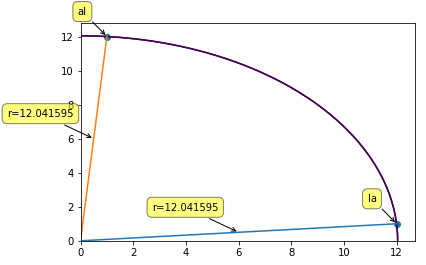

In [11]:
def plot_anagrams(lists_words,r_annotate=True ):
    '''plot list anagrams '''
    for list_words in lists_words:
        
        data_x=[]
        data_y=[]
        for w in list_words:
            words_datas[w]
            data_x.append(words_datas[w]['coor'][0])
            data_y.append(words_datas[w]['coor'][1])
            x = np.linspace(0, words_datas[w]['r'], 100)
            y = np.linspace(0, words_datas[w]['r'], 100)
            X, Y = np.meshgrid(x,y)
            F = X**2 + Y**2 - words_datas[w]['r']**2
            plt.contour(X,Y,F,[0])
            plt.plot([0,words_datas[w]['coor'][0]],[0,words_datas[w]['coor'][1]])
            if r_annotate:
                plt.annotate(
                    'r=%f'%words_datas[w]['r'],
                    xy=(words_datas[w]['coor'][0]/2, words_datas[w]['coor'][1]/2), xytext=(-20, 20),
                    textcoords='offset points', ha='right', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        labels=list_words


        plt.scatter(data_x, data_y)

        for label, x, y in zip(labels, data_x, data_y):
            plt.annotate(
                label,
                xy=(x, y), xytext=(-20, 20),
                textcoords='offset points', ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
lists_words=[['la','al']]
plot_anagrams(lists_words)
plt.show()

Como podéis observar ambas palabras están en la misma circunferencia ya que tienen los mismo radios. Hemos creado una función que nos permitiría dibujar un conjunto de listas de anagramas

### ¿Cuántos círculos hay?

Bien, hemos visto con este ejemplo que un conjunto de anagramas nos proporciona una círcunferencia. Lo siguiente que me pregunto es ¿Cuántos anagramas, o lo que es lo mismo cuántos círculos para palabras de 2 letras hay?

Para eso hemos de conseguir una buena lista de palabras que nos ayude. Como por ejemplo:

* ad, da
* ah, ha
* al, ál, la
* ay, ya
* eh, he
* el, él, le
* es, se, sé
* fu, uf
* os, so

{'ad': {'coor': [1, 4], 'r': 4.1231056256176606}, 'da': {'coor': [4, 1], 'r': 4.1231056256176606}, 'ah': {'coor': [1, 8], 'r': 8.0622577482985491}, 'ha': {'coor': [8, 1], 'r': 8.0622577482985491}, 'al': {'coor': [1, 12], 'r': 12.041594578792296}, 'la': {'coor': [12, 1], 'r': 12.041594578792296}, 'ay': {'coor': [1, 26], 'r': 26.019223662515376}, 'ya': {'coor': [26, 1], 'r': 26.019223662515376}, 'eh': {'coor': [5, 8], 'r': 9.4339811320566032}, 'he': {'coor': [8, 5], 'r': 9.4339811320566032}, 'el': {'coor': [5, 12], 'r': 13.0}, 'le': {'coor': [12, 5], 'r': 13.0}, 'es': {'coor': [5, 20], 'r': 20.615528128088304}, 'se': {'coor': [20, 5], 'r': 20.615528128088304}, 'fu': {'coor': [6, 22], 'r': 22.803508501982758}, 'uf': {'coor': [22, 6], 'r': 22.803508501982758}, 'os': {'coor': [16, 20], 'r': 25.612496949731394}, 'so': {'coor': [20, 16], 'r': 25.612496949731394}}


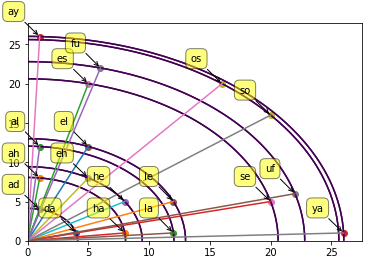

In [13]:
lists_words=[['ad','da'],['ah','ha'],['al','la'],['ay','ya'],['eh','he'],['el','le'],['es','se'],['fu','uf'],['os','so']]
words_datas={}
for list_words in lists_words:
    for w in list_words:
        words_datas[w]=get_coor(w,'es')
print(words_datas)
plot_anagrams(lists_words,r_annotate=False)
plt.show()